In [ ]:
# Train ADAGE models on Staph aureus data

### Georgia Doing 2022

This notebook walks through first training an ADAGE model on the same array compnedium that published eADAGE was trained on and then training a seqADAGE model on a compendium of *S. aureus* RNAseq data. The focus is on the applying the workflow to this organism.

The main objectives are to validate the training workflow using
1. Loss and validation loss curves
2. Node weight distributions
3. Node KEGG and GO enrichments

In [12]:
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage
from scipy.stats import hypergeom
import csv

In [ ]:
# for dev purposes, while updating run_model.py need to reload
# for dev purposes, while updating run_model.py need to reload
reload(run_model)
reload(Adage)

In [ ]:
## Base features (from ADAGE)

For the sake of this efficiency, starting with the following parameters:

* hidden features: 300
* epochs: 500
* curruption: 0.01
* batchs zie: 10
* validatoin split: 0.1
* activation: sigmoid
* objective: binary cross-entropy



2266 239


/Users/doingg/miniforge3/envs/tf/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


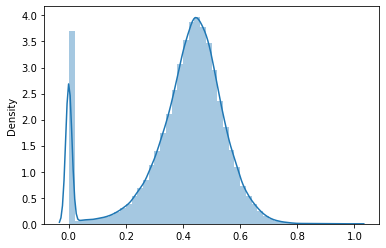

In [13]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
all_comp = np.loadtxt(open('../data_files/se16_log_counts_norm_01_nonames.csv', "rb"),delimiter=',',skiprows = 1)
gene_num = np.size(all_comp, 0)
samp_num = np.size(all_comp, 1)
print(gene_num, samp_num)
fig = sns.distplot(all_comp.flatten())

In [14]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
seq_temp = run_model.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
arr_temp = run_model.run_model('../data_files/train_set_normalized.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

2022-05-23 15:13:36.396364: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


86/86 [==============================] - 1s 6ms/step - loss: 0.6933 - val_loss: 0.6908


(5549, 600)

In [6]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict2 = {
    "tf_adage": tf_adage
}
model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                    print(name)
                    mseq = run_model.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_seq2[name] = mseq

ad_glorot_uniform_0_sigmoid_tiedTrue
Epoch 1/300
22/22 [==============================] - 1s 5ms/step - loss: 0.6957 - val_loss: 0.6861
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6787 - val_loss: 0.6729
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6675 - val_loss: 0.6639
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6588 - val_loss: 0.6567
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6520 - val_loss: 0.6513
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6470 - val_loss: 0.6475
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6435 - val_loss: 0.6449
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6410 - val_loss: 0.6430
Epoch 9/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6391 - val_loss: 0.6415
Epoch 10/300
22/22 [==============================] - 0s 3ms/step - loss

22/22 [==============================] - 0s 3ms/step - loss: 0.6238 - val_loss: 0.6286
Epoch 164/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6238 - val_loss: 0.6286
Epoch 165/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6238 - val_loss: 0.6286
Epoch 166/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6237 - val_loss: 0.6286
Epoch 167/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6237 - val_loss: 0.6286
Epoch 168/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6237 - val_loss: 0.6285
Epoch 169/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6236 - val_loss: 0.6285
Epoch 170/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6236 - val_loss: 0.6285
Epoch 171/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6236 - val_loss: 0.6285
Epoch 172/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6235 - val_loss: 0.6284
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6251 - val_loss: 0.6295
Epoch 26/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6250 - val_loss: 0.6294
Epoch 27/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6250 - val_loss: 0.6294
Epoch 28/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6250 - val_loss: 0.6294
Epoch 29/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6294
Epoch 30/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6294
Epoch 31/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6295
Epoch 32/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6294
Epoch 33/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6294
Epoch 34/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6294
Epoch 35/300


Epoch 107/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6292
Epoch 108/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6292
Epoch 109/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6291
Epoch 110/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6292
Epoch 111/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6290
Epoch 112/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6291
Epoch 113/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6292
Epoch 114/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6291
Epoch 115/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_loss: 0.6290
Epoch 116/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6245 - val_los

22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6290
Epoch 189/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6290
Epoch 190/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6291
Epoch 191/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6290
Epoch 192/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6290
Epoch 193/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6290
Epoch 194/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6290
Epoch 195/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6290
Epoch 196/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6289
Epoch 197/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6289
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6338 - val_loss: 0.6387
Epoch 51/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6338 - val_loss: 0.6385
Epoch 52/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6337 - val_loss: 0.6386
Epoch 53/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6336 - val_loss: 0.6383
Epoch 54/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6335 - val_loss: 0.6383
Epoch 55/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6334 - val_loss: 0.6383
Epoch 56/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6333 - val_loss: 0.6382
Epoch 57/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6333 - val_loss: 0.6382
Epoch 58/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6332 - val_loss: 0.6380
Epoch 59/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6332 - val_loss: 0.6383
Epoch 60/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6294 - val_loss: 0.6355
Epoch 213/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6294 - val_loss: 0.6350
Epoch 214/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6294 - val_loss: 0.6354
Epoch 215/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.6352
Epoch 216/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6294 - val_loss: 0.6351
Epoch 217/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.6351
Epoch 218/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.6353
Epoch 219/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6292 - val_loss: 0.6351
Epoch 220/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.6351
Epoch 221/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.6350
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6290
Epoch 75/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6290
Epoch 76/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6243 - val_loss: 0.6290
Epoch 77/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6290
Epoch 78/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6290
Epoch 79/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6289
Epoch 80/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6289
Epoch 81/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6242 - val_loss: 0.6289
Epoch 82/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6242 - val_loss: 0.6289
Epoch 83/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6242 - val_loss: 0.6289
Epoch 84/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6200 - val_loss: 0.6258
Epoch 237/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6200 - val_loss: 0.6258
Epoch 238/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6200 - val_loss: 0.6258
Epoch 239/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6200 - val_loss: 0.6258
Epoch 240/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.6258
Epoch 241/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.6258
Epoch 242/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.6258
Epoch 243/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.6258
Epoch 244/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.6258
Epoch 245/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.6258
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6220 - val_loss: 0.6280
Epoch 100/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6218 - val_loss: 0.6279
Epoch 101/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6216 - val_loss: 0.6277
Epoch 102/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6215 - val_loss: 0.6276
Epoch 103/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6213 - val_loss: 0.6274
Epoch 104/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6212 - val_loss: 0.6272
Epoch 105/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6210 - val_loss: 0.6272
Epoch 106/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6209 - val_loss: 0.6268
Epoch 107/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6208 - val_loss: 0.6268
Epoch 108/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6206 - val_loss: 0.6266
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6162 - val_loss: 0.6221
Epoch 262/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6162 - val_loss: 0.6221
Epoch 263/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6162 - val_loss: 0.6221
Epoch 264/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6162 - val_loss: 0.6221
Epoch 265/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.6221
Epoch 266/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.6221
Epoch 267/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.6221
Epoch 268/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.6221
Epoch 269/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.6221
Epoch 270/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.6221
Epoc

Epoch 124/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6208 - val_loss: 0.6264
Epoch 125/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6208 - val_loss: 0.6263
Epoch 126/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6207 - val_loss: 0.6264
Epoch 127/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6207 - val_loss: 0.6262
Epoch 128/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6207 - val_loss: 0.6262
Epoch 129/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6206 - val_loss: 0.6263
Epoch 130/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6206 - val_loss: 0.6262
Epoch 131/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6205 - val_loss: 0.6262
Epoch 132/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6205 - val_loss: 0.6261
Epoch 133/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6205 - val_los

22/22 [==============================] - 0s 3ms/step - loss: 0.6191 - val_loss: 0.6257
Epoch 206/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6191 - val_loss: 0.6256
Epoch 207/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6257
Epoch 208/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6255
Epoch 209/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6257
Epoch 210/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6257
Epoch 211/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6256
Epoch 212/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6257
Epoch 213/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6256
Epoch 214/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6255
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.7139 - val_loss: 0.7178
Epoch 68/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7129 - val_loss: 0.7168
Epoch 69/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7119 - val_loss: 0.7158
Epoch 70/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7110 - val_loss: 0.7149
Epoch 71/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7100 - val_loss: 0.7139
Epoch 72/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7090 - val_loss: 0.7129
Epoch 73/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7080 - val_loss: 0.7120
Epoch 74/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7071 - val_loss: 0.7110
Epoch 75/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7061 - val_loss: 0.7100
Epoch 76/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7052 - val_loss: 0.7091
Epoch 77/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6438 - val_loss: 0.6481
Epoch 230/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6437 - val_loss: 0.6481
Epoch 231/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6437 - val_loss: 0.6480
Epoch 232/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6437 - val_loss: 0.6480
Epoch 233/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6436 - val_loss: 0.6480
Epoch 234/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6436 - val_loss: 0.6479
Epoch 235/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6436 - val_loss: 0.6479
Epoch 236/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6435 - val_loss: 0.6478
Epoch 237/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6435 - val_loss: 0.6478
Epoch 238/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6435 - val_loss: 0.6478
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.7784 - val_loss: 0.7811
Epoch 11/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7766 - val_loss: 0.7795
Epoch 12/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7748 - val_loss: 0.7779
Epoch 13/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7732 - val_loss: 0.7763
Epoch 14/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7716 - val_loss: 0.7748
Epoch 15/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7700 - val_loss: 0.7734
Epoch 16/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7685 - val_loss: 0.7719
Epoch 17/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7670 - val_loss: 0.7704
Epoch 18/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7655 - val_loss: 0.7690
Epoch 19/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7641 - val_loss: 0.7676
Epoch 20/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6814 - val_loss: 0.6855
Epoch 93/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6805 - val_loss: 0.6846
Epoch 94/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6797 - val_loss: 0.6837
Epoch 95/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6788 - val_loss: 0.6829
Epoch 96/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6779 - val_loss: 0.6821
Epoch 97/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6771 - val_loss: 0.6811
Epoch 98/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6763 - val_loss: 0.6804
Epoch 99/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6754 - val_loss: 0.6795
Epoch 100/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6746 - val_loss: 0.6787
Epoch 101/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6738 - val_loss: 0.6778
Epoch 102/3

22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6292
Epoch 255/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6293
Epoch 256/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6292
Epoch 257/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6292
Epoch 258/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6292
Epoch 259/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6292
Epoch 260/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6292
Epoch 261/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6292
Epoch 262/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6248 - val_loss: 0.6292
Epoch 263/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6248 - val_loss: 0.6292
Epoc

Epoch 117/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6798 - val_loss: 0.6843
Epoch 118/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6792 - val_loss: 0.6837
Epoch 119/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6786 - val_loss: 0.6831
Epoch 120/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6781 - val_loss: 0.6826
Epoch 121/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6775 - val_loss: 0.6820
Epoch 122/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6769 - val_loss: 0.6815
Epoch 123/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6763 - val_loss: 0.6808
Epoch 124/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6758 - val_loss: 0.6803
Epoch 125/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6752 - val_loss: 0.6797
Epoch 126/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6747 - val_los

22/22 [==============================] - 0s 3ms/step - loss: 0.6545 - val_loss: 0.6593
Epoch 199/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6544 - val_loss: 0.6592
Epoch 200/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6544 - val_loss: 0.6592
Epoch 201/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6543 - val_loss: 0.6591
Epoch 202/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6542 - val_loss: 0.6590
Epoch 203/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6541 - val_loss: 0.6589
Epoch 204/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6541 - val_loss: 0.6588
Epoch 205/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6540 - val_loss: 0.6588
Epoch 206/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6539 - val_loss: 0.6587
Epoch 207/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6539 - val_loss: 0.6586
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.7127 - val_loss: 0.7168
Epoch 61/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7116 - val_loss: 0.7156
Epoch 62/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7105 - val_loss: 0.7146
Epoch 63/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7094 - val_loss: 0.7134
Epoch 64/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7083 - val_loss: 0.7124
Epoch 65/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7073 - val_loss: 0.7114
Epoch 66/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7062 - val_loss: 0.7103
Epoch 67/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7051 - val_loss: 0.7092
Epoch 68/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7041 - val_loss: 0.7081
Epoch 69/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7031 - val_loss: 0.7071
Epoch 70/300


22/22 [==============================] - 0s 4ms/step - loss: 0.6265 - val_loss: 0.6313
Epoch 223/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6264 - val_loss: 0.6314
Epoch 224/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6264 - val_loss: 0.6312
Epoch 225/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6263 - val_loss: 0.6312
Epoch 226/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6263 - val_loss: 0.6311
Epoch 227/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.6311
Epoch 228/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.6311
Epoch 229/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6262 - val_loss: 0.6310
Epoch 230/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6261 - val_loss: 0.6310
Epoch 231/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6261 - val_loss: 0.6310
Epoc

Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.8432 - val_loss: 0.8382
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 0.8312 - val_loss: 0.8261
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 0.8190 - val_loss: 0.8162
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8101 - val_loss: 0.8097
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 0.8043 - val_loss: 0.8054
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 0.8003 - val_loss: 0.8022
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7973 - val_loss: 0.7997
Epoch 10/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7947 - val_loss: 0.7974
Epoch 11/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7925 - val_loss: 0.7955
Epoch 12/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7905 - val_loss: 0.7935
Epoch 1

Epoch 85/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6979 - val_loss: 0.7026
Epoch 86/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6969 - val_loss: 0.7017
Epoch 87/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6960 - val_loss: 0.7007
Epoch 88/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6950 - val_loss: 0.6998
Epoch 89/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6940 - val_loss: 0.6987
Epoch 90/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6931 - val_loss: 0.6977
Epoch 91/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6921 - val_loss: 0.6968
Epoch 92/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6912 - val_loss: 0.6960
Epoch 93/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6902 - val_loss: 0.6949
Epoch 94/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6893 - val_loss: 0.6943


22/22 [==============================] - 0s 3ms/step - loss: 0.6322 - val_loss: 0.6375
Epoch 248/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6321 - val_loss: 0.6374
Epoch 249/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6320 - val_loss: 0.6373
Epoch 250/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6320 - val_loss: 0.6373
Epoch 251/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6319 - val_loss: 0.6372
Epoch 252/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6318 - val_loss: 0.6371
Epoch 253/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6317 - val_loss: 0.6370
Epoch 254/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6317 - val_loss: 0.6369
Epoch 255/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6316 - val_loss: 0.6369
Epoch 256/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6315 - val_loss: 0.6368
Epoc

Epoch 110/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6654 - val_loss: 0.6701
Epoch 111/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6646 - val_loss: 0.6693
Epoch 112/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6639 - val_loss: 0.6686
Epoch 113/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6631 - val_loss: 0.6677
Epoch 114/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6624 - val_loss: 0.6670
Epoch 115/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6616 - val_loss: 0.6664
Epoch 116/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6609 - val_loss: 0.6655
Epoch 117/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6602 - val_loss: 0.6648
Epoch 118/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6595 - val_loss: 0.6641
Epoch 119/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6588 - val_los

22/22 [==============================] - 0s 4ms/step - loss: 0.6273 - val_loss: 0.6327
Epoch 192/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6271 - val_loss: 0.6324
Epoch 193/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6269 - val_loss: 0.6323
Epoch 194/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6267 - val_loss: 0.6321
Epoch 195/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6266 - val_loss: 0.6320
Epoch 196/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6264 - val_loss: 0.6318
Epoch 197/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6263 - val_loss: 0.6317
Epoch 198/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6261 - val_loss: 0.6315
Epoch 199/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6260 - val_loss: 0.6313
Epoch 200/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6258 - val_loss: 0.6312
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6278 - val_loss: 0.6324
Epoch 54/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6278 - val_loss: 0.6323
Epoch 55/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6277 - val_loss: 0.6323
Epoch 56/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6277 - val_loss: 0.6322
Epoch 57/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6276 - val_loss: 0.6322
Epoch 58/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6276 - val_loss: 0.6322
Epoch 59/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6275 - val_loss: 0.6321
Epoch 60/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6274 - val_loss: 0.6321
Epoch 61/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6274 - val_loss: 0.6320
Epoch 62/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6273 - val_loss: 0.6320
Epoch 63/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6224 - val_loss: 0.6274
Epoch 216/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.6274
Epoch 217/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.6273
Epoch 218/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.6273
Epoch 219/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6273
Epoch 220/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6273
Epoch 221/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6272
Epoch 222/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6272
Epoch 223/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6221 - val_loss: 0.6272
Epoch 224/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6221 - val_loss: 0.6271
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6291
Epoch 78/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6292
Epoch 79/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6291
Epoch 80/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6292
Epoch 81/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6292
Epoch 82/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6292
Epoch 83/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6292
Epoch 84/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6292
Epoch 85/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6292
Epoch 86/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6291
Epoch 87/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6289
Epoch 240/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6289
Epoch 241/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6289
Epoch 242/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6290
Epoch 243/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6290
Epoch 244/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6288
Epoch 245/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6288
Epoch 246/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6289
Epoch 247/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6242 - val_loss: 0.6289
Epoch 248/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6242 - val_loss: 0.6289
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6314 - val_loss: 0.6366
Epoch 103/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6314 - val_loss: 0.6365
Epoch 104/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6314 - val_loss: 0.6364
Epoch 105/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6313 - val_loss: 0.6364
Epoch 106/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6313 - val_loss: 0.6365
Epoch 107/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6313 - val_loss: 0.6364
Epoch 108/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6313 - val_loss: 0.6364
Epoch 109/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6312 - val_loss: 0.6362
Epoch 110/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6312 - val_loss: 0.6363
Epoch 111/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6312 - val_loss: 0.6365
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6287 - val_loss: 0.6346
Epoch 265/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6287 - val_loss: 0.6349
Epoch 266/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6287 - val_loss: 0.6347
Epoch 267/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6286 - val_loss: 0.6349
Epoch 268/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6287 - val_loss: 0.6344
Epoch 269/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6286 - val_loss: 0.6351
Epoch 270/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6286 - val_loss: 0.6346
Epoch 271/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6286 - val_loss: 0.6348
Epoch 272/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6286 - val_loss: 0.6349
Epoch 273/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6286 - val_loss: 0.6347
Epoc

Epoch 127/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6224 - val_loss: 0.6274
Epoch 128/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6224 - val_loss: 0.6273
Epoch 129/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6224 - val_loss: 0.6274
Epoch 130/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.6272
Epoch 131/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.6273
Epoch 132/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6272
Epoch 133/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6272
Epoch 134/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6221 - val_loss: 0.6271
Epoch 135/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6221 - val_loss: 0.6271
Epoch 136/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6221 - val_los

22/22 [==============================] - 0s 3ms/step - loss: 0.6201 - val_loss: 0.6258
Epoch 209/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6201 - val_loss: 0.6258
Epoch 210/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6201 - val_loss: 0.6258
Epoch 211/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6201 - val_loss: 0.6258
Epoch 212/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6201 - val_loss: 0.6258
Epoch 213/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6201 - val_loss: 0.6258
Epoch 214/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6201 - val_loss: 0.6258
Epoch 215/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6200 - val_loss: 0.6258
Epoch 216/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6200 - val_loss: 0.6258
Epoch 217/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6200 - val_loss: 0.6258
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6287 - val_loss: 0.6344
Epoch 71/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6285 - val_loss: 0.6338
Epoch 72/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6283 - val_loss: 0.6338
Epoch 73/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6280 - val_loss: 0.6337
Epoch 74/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6277 - val_loss: 0.6332
Epoch 75/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6275 - val_loss: 0.6331
Epoch 76/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6272 - val_loss: 0.6329
Epoch 77/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6270 - val_loss: 0.6326
Epoch 78/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6267 - val_loss: 0.6325
Epoch 79/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6265 - val_loss: 0.6325
Epoch 80/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6166 - val_loss: 0.6224
Epoch 233/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6166 - val_loss: 0.6224
Epoch 234/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6166 - val_loss: 0.6224
Epoch 235/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6166 - val_loss: 0.6224
Epoch 236/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6166 - val_loss: 0.6224
Epoch 237/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.6224
Epoch 238/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.6224
Epoch 239/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.6224
Epoch 240/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.6223
Epoch 241/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.6223
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6294
Epoch 14/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6248 - val_loss: 0.6294
Epoch 15/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6248 - val_loss: 0.6297
Epoch 16/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6248 - val_loss: 0.6296
Epoch 17/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6247 - val_loss: 0.6293
Epoch 18/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6247 - val_loss: 0.6295
Epoch 19/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6247 - val_loss: 0.6293
Epoch 20/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6247 - val_loss: 0.6293
Epoch 21/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6247 - val_loss: 0.6294
Epoch 22/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6292
Epoch 23/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.6275
Epoch 96/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.6276
Epoch 97/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6273
Epoch 98/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6274
Epoch 99/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6221 - val_loss: 0.6273
Epoch 100/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6220 - val_loss: 0.6273
Epoch 101/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6220 - val_loss: 0.6273
Epoch 102/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6219 - val_loss: 0.6271
Epoch 103/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6219 - val_loss: 0.6271
Epoch 104/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6218 - val_loss: 0.6271
Epoch 10

22/22 [==============================] - 0s 3ms/step - loss: 0.6185 - val_loss: 0.6254
Epoch 258/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6185 - val_loss: 0.6255
Epoch 259/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6185 - val_loss: 0.6254
Epoch 260/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6185 - val_loss: 0.6255
Epoch 261/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6185 - val_loss: 0.6254
Epoch 262/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6184 - val_loss: 0.6254
Epoch 263/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6184 - val_loss: 0.6254
Epoch 264/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6184 - val_loss: 0.6254
Epoch 265/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6184 - val_loss: 0.6255
Epoch 266/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6184 - val_loss: 0.6254
Epoc

Epoch 120/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6729 - val_loss: 0.6770
Epoch 121/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6724 - val_loss: 0.6765
Epoch 122/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6718 - val_loss: 0.6760
Epoch 123/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6713 - val_loss: 0.6755
Epoch 124/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6708 - val_loss: 0.6750
Epoch 125/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6703 - val_loss: 0.6745
Epoch 126/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6699 - val_loss: 0.6740
Epoch 127/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6694 - val_loss: 0.6735
Epoch 128/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6689 - val_loss: 0.6730
Epoch 129/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6684 - val_los

22/22 [==============================] - 0s 4ms/step - loss: 0.6476 - val_loss: 0.6519
Epoch 202/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6475 - val_loss: 0.6517
Epoch 203/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6473 - val_loss: 0.6516
Epoch 204/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6472 - val_loss: 0.6514
Epoch 205/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6471 - val_loss: 0.6513
Epoch 206/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6469 - val_loss: 0.6512
Epoch 207/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6468 - val_loss: 0.6511
Epoch 208/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6467 - val_loss: 0.6510
Epoch 209/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6466 - val_loss: 0.6509
Epoch 210/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6465 - val_loss: 0.6507
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.7046 - val_loss: 0.7086
Epoch 64/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7036 - val_loss: 0.7075
Epoch 65/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7026 - val_loss: 0.7066
Epoch 66/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7017 - val_loss: 0.7057
Epoch 67/300
22/22 [==============================] - 0s 6ms/step - loss: 0.7007 - val_loss: 0.7047
Epoch 68/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6998 - val_loss: 0.7038
Epoch 69/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6989 - val_loss: 0.7029
Epoch 70/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6979 - val_loss: 0.7020
Epoch 71/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6970 - val_loss: 0.7010
Epoch 72/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6961 - val_loss: 0.7001
Epoch 73/300


22/22 [==============================] - 0s 5ms/step - loss: 0.6286 - val_loss: 0.6329
Epoch 226/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6285 - val_loss: 0.6328
Epoch 227/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6284 - val_loss: 0.6327
Epoch 228/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6283 - val_loss: 0.6326
Epoch 229/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6282 - val_loss: 0.6325
Epoch 230/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6281 - val_loss: 0.6324
Epoch 231/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6280 - val_loss: 0.6323
Epoch 232/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6279 - val_loss: 0.6322
Epoch 233/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6278 - val_loss: 0.6321
Epoch 234/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6277 - val_loss: 0.6320
Epoc

Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8024 - val_loss: 0.8024
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7975 - val_loss: 0.7984
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7937 - val_loss: 0.7952
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7906 - val_loss: 0.7926
Epoch 10/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7880 - val_loss: 0.7902
Epoch 11/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7857 - val_loss: 0.7882
Epoch 12/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7836 - val_loss: 0.7863
Epoch 13/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7816 - val_loss: 0.7844
Epoch 14/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7798 - val_loss: 0.7827
Epoch 15/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7780 - val_loss: 0.7811
Epoc

Epoch 88/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6993 - val_loss: 0.7036
Epoch 89/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6986 - val_loss: 0.7030
Epoch 90/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6979 - val_loss: 0.7023
Epoch 91/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6972 - val_loss: 0.7016
Epoch 92/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6965 - val_loss: 0.7008
Epoch 93/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6958 - val_loss: 0.7001
Epoch 94/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6951 - val_loss: 0.6995
Epoch 95/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6944 - val_loss: 0.6988
Epoch 96/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6937 - val_loss: 0.6982
Epoch 97/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6931 - val_loss: 0.6975


22/22 [==============================] - 0s 3ms/step - loss: 0.6525 - val_loss: 0.6573
Epoch 251/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6524 - val_loss: 0.6572
Epoch 252/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6524 - val_loss: 0.6571
Epoch 253/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6523 - val_loss: 0.6571
Epoch 254/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6523 - val_loss: 0.6571
Epoch 255/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6522 - val_loss: 0.6570
Epoch 256/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6522 - val_loss: 0.6569
Epoch 257/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6521 - val_loss: 0.6569
Epoch 258/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6521 - val_loss: 0.6568
Epoch 259/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6520 - val_loss: 0.6568
Epoc

Epoch 113/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6649 - val_loss: 0.6691
Epoch 114/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6642 - val_loss: 0.6685
Epoch 115/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6636 - val_loss: 0.6679
Epoch 116/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6630 - val_loss: 0.6673
Epoch 117/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6624 - val_loss: 0.6667
Epoch 118/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6618 - val_loss: 0.6661
Epoch 119/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6613 - val_loss: 0.6656
Epoch 120/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6607 - val_loss: 0.6650
Epoch 121/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6601 - val_loss: 0.6644
Epoch 122/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6595 - val_los

22/22 [==============================] - 0s 3ms/step - loss: 0.6328 - val_loss: 0.6375
Epoch 195/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6326 - val_loss: 0.6373
Epoch 196/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6324 - val_loss: 0.6371
Epoch 197/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6322 - val_loss: 0.6370
Epoch 198/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6320 - val_loss: 0.6367
Epoch 199/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6318 - val_loss: 0.6365
Epoch 200/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6317 - val_loss: 0.6363
Epoch 201/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6315 - val_loss: 0.6362
Epoch 202/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.6360
Epoch 203/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6311 - val_loss: 0.6359
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.7243 - val_loss: 0.7287
Epoch 57/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7232 - val_loss: 0.7277
Epoch 58/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7222 - val_loss: 0.7267
Epoch 59/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7211 - val_loss: 0.7257
Epoch 60/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7200 - val_loss: 0.7246
Epoch 61/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7190 - val_loss: 0.7235
Epoch 62/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7179 - val_loss: 0.7226
Epoch 63/300
22/22 [==============================] - 0s 3ms/step - loss: 0.7169 - val_loss: 0.7215
Epoch 64/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7159 - val_loss: 0.7207
Epoch 65/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7149 - val_loss: 0.7195
Epoch 66/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6374 - val_loss: 0.6424
Epoch 219/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6372 - val_loss: 0.6422
Epoch 220/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6370 - val_loss: 0.6421
Epoch 221/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6369 - val_loss: 0.6420
Epoch 222/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6367 - val_loss: 0.6418
Epoch 223/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6366 - val_loss: 0.6417
Epoch 224/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6365 - val_loss: 0.6415
Epoch 225/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6363 - val_loss: 0.6414
Epoch 226/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6362 - val_loss: 0.6412
Epoch 227/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6360 - val_loss: 0.6411
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6885 - val_loss: 0.6928
Epoch 81/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6876 - val_loss: 0.6919
Epoch 82/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6868 - val_loss: 0.6911
Epoch 83/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6859 - val_loss: 0.6903
Epoch 84/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6851 - val_loss: 0.6895
Epoch 85/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6843 - val_loss: 0.6889
Epoch 86/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6835 - val_loss: 0.6879
Epoch 87/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6827 - val_loss: 0.6870
Epoch 88/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6819 - val_loss: 0.6863
Epoch 89/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6811 - val_loss: 0.6854
Epoch 90/300


22/22 [==============================] - 0s 3ms/step - loss: 0.6248 - val_loss: 0.6306
Epoch 243/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6248 - val_loss: 0.6305
Epoch 244/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6247 - val_loss: 0.6304
Epoch 245/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6246 - val_loss: 0.6305
Epoch 246/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6245 - val_loss: 0.6303
Epoch 247/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6303
Epoch 248/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6244 - val_loss: 0.6302
Epoch 249/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6243 - val_loss: 0.6301
Epoch 250/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6300
Epoch 251/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6300
Epoc

[Text(0.5, 1.0, 'tf_adage')]

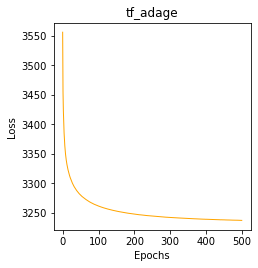

In [10]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict_seq2[name]
ax.plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax.set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



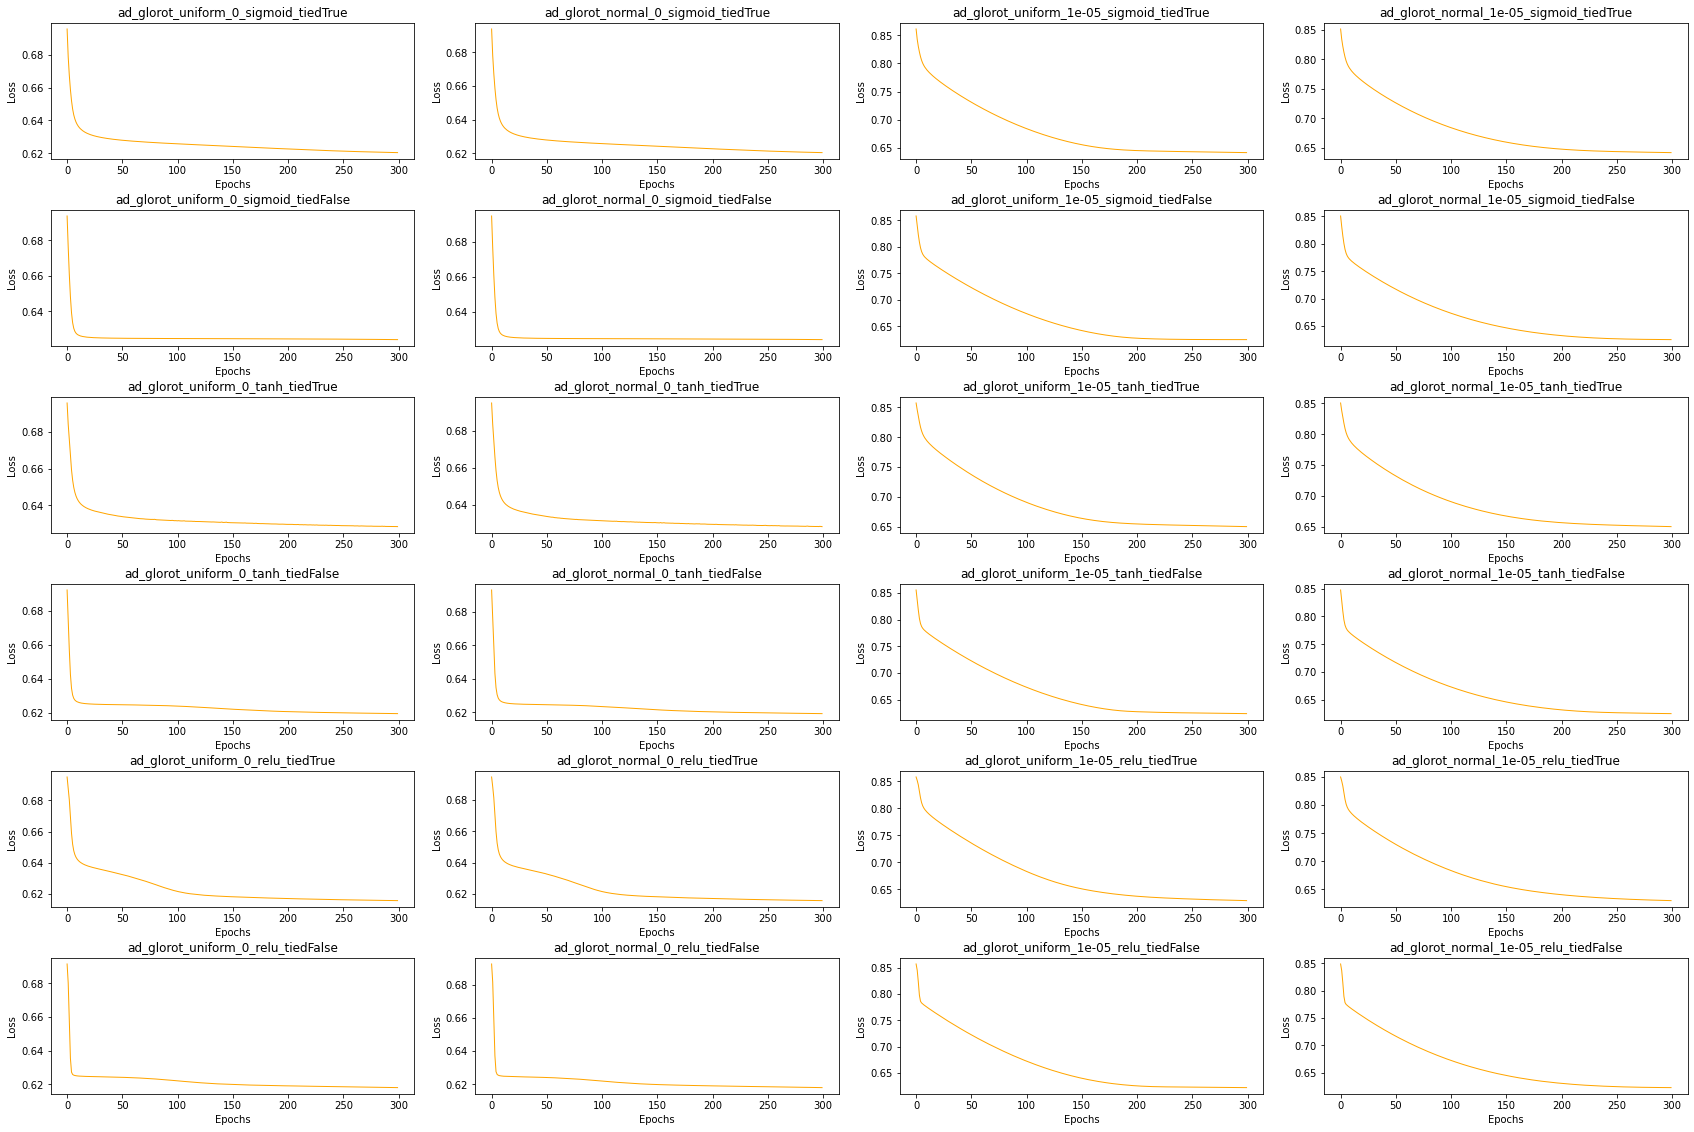

In [11]:
model_dict = model_dict_seq2

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,300)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

/Users/doingg/miniforge3/envs/tf/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


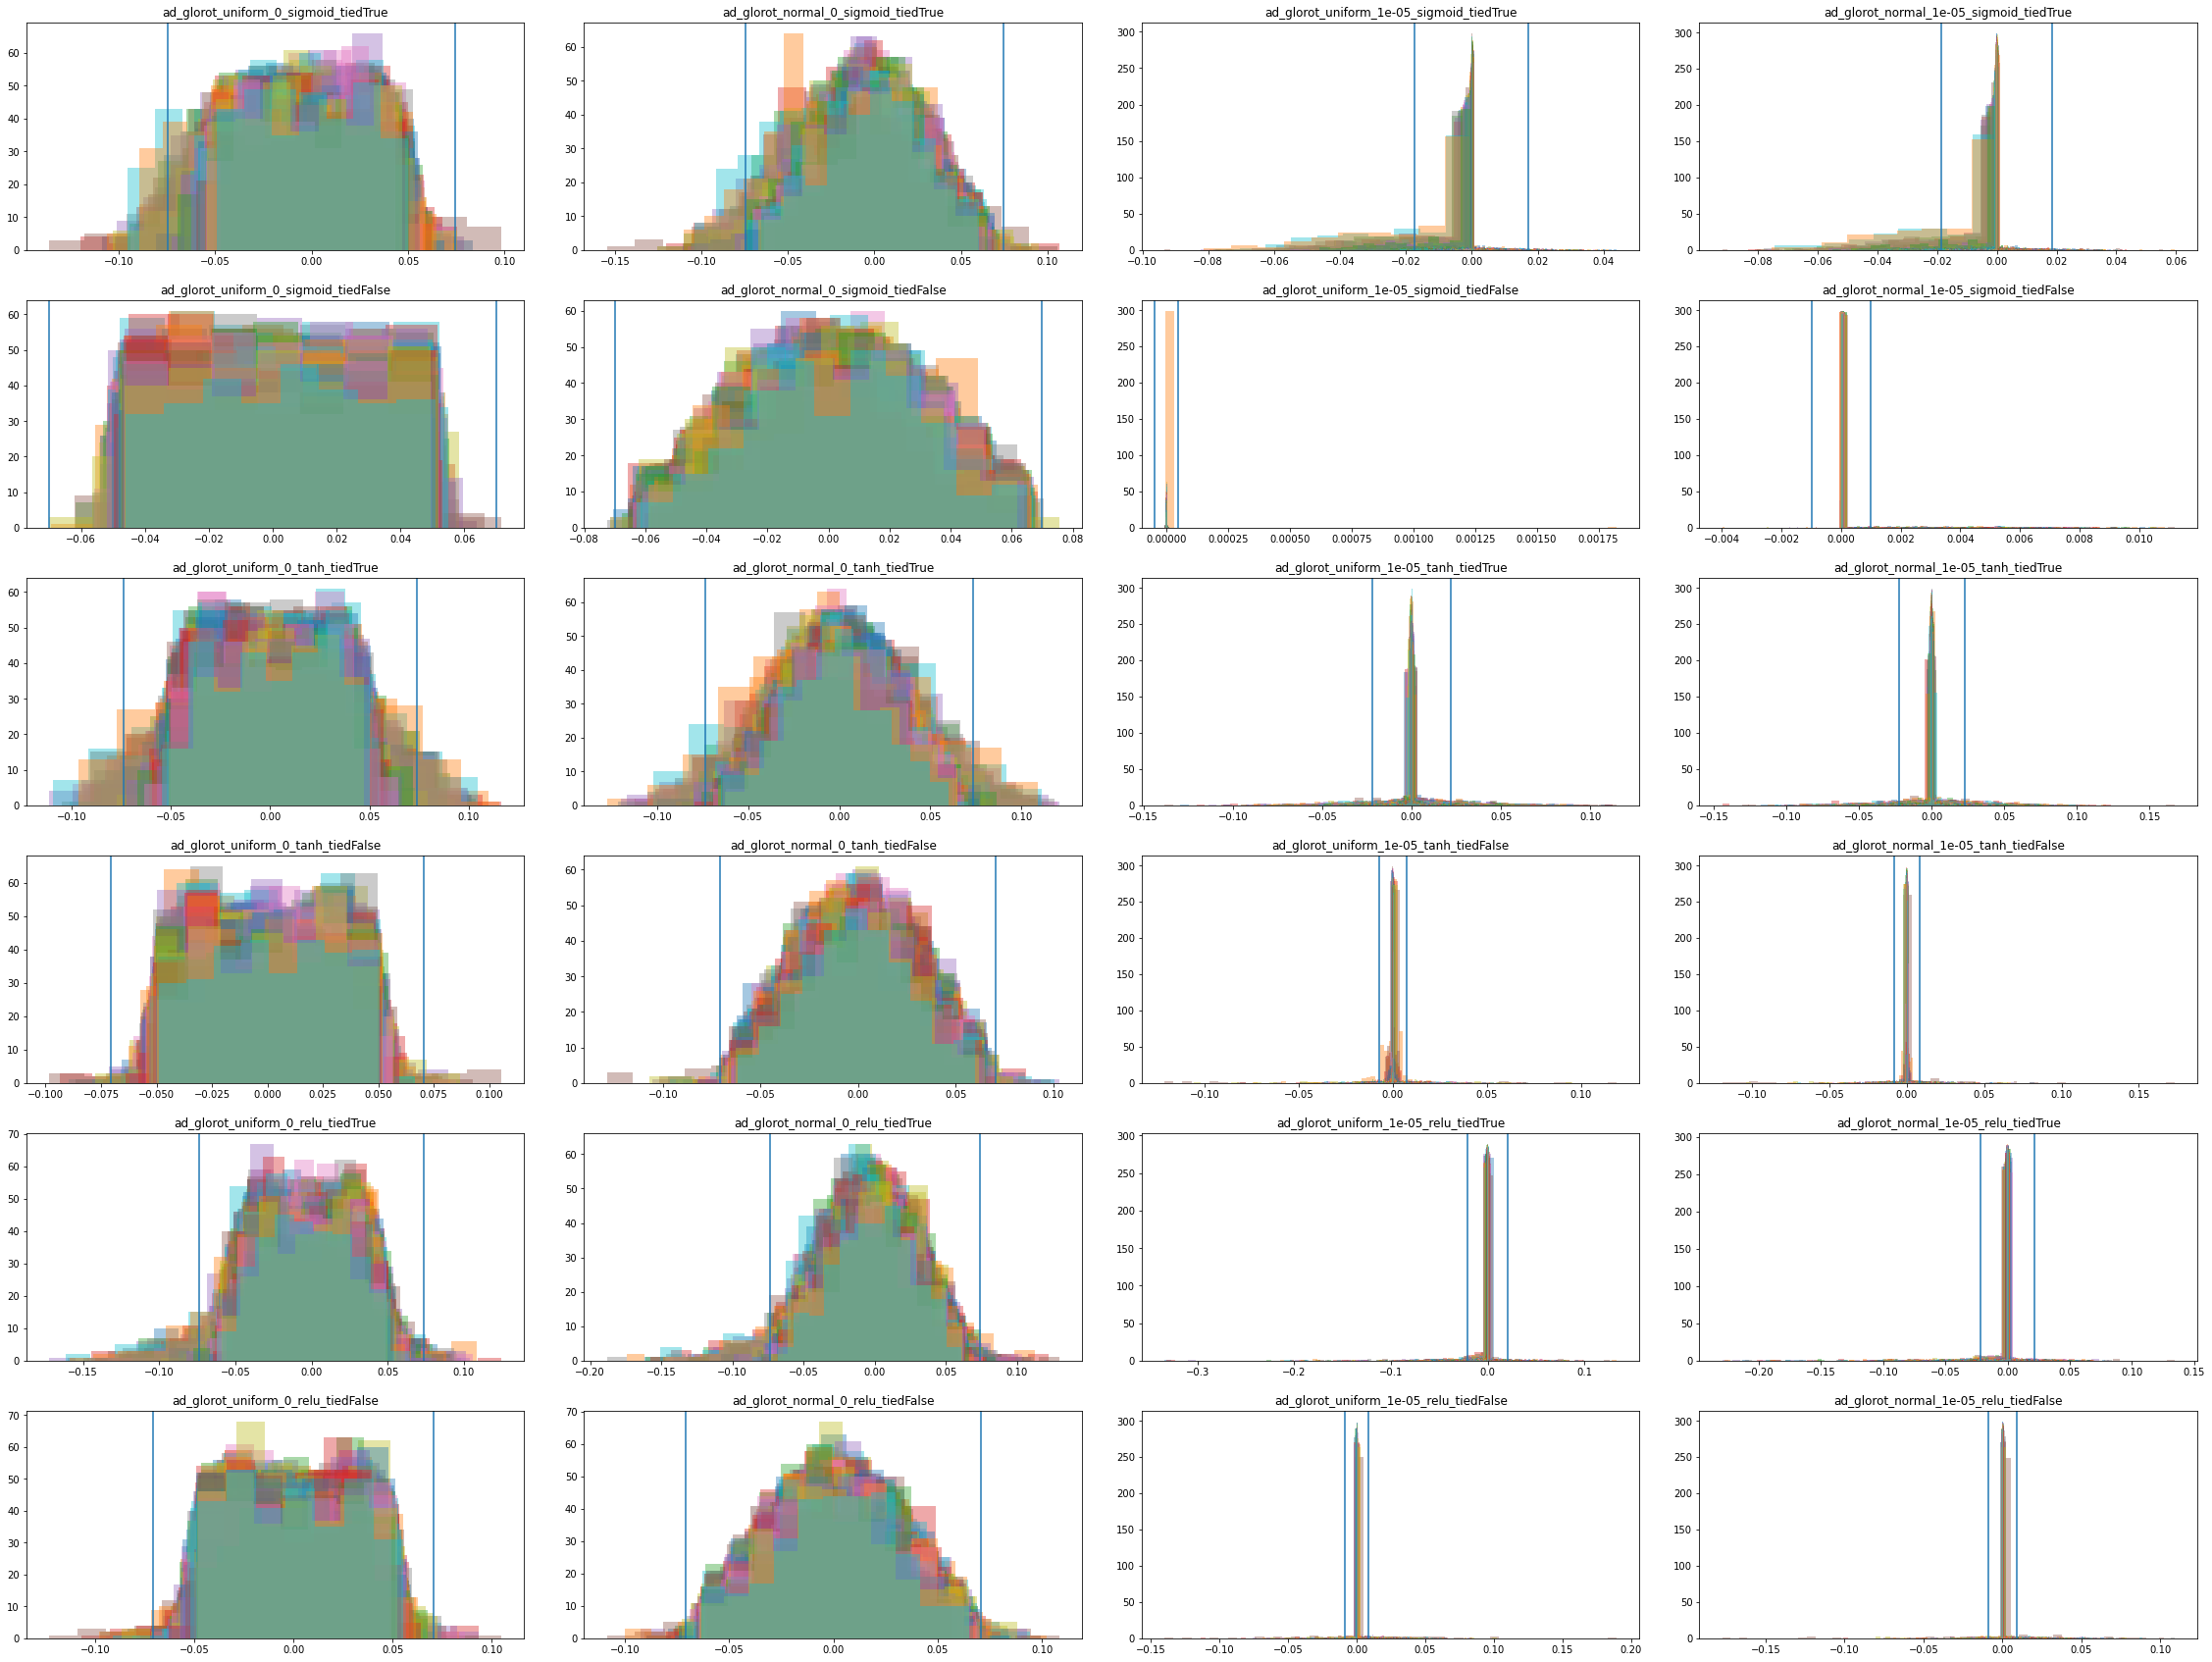

In [12]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


    

In [17]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]


model_dict_pan2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                    print(name)
                    mseq = run_model.run_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_pan2[name] = mseq

ad_glorot_uniform_0_sigmoid_tiedTrue
Epoch 1/300
16/16 [==============================] - 0s 15ms/step - loss: 0.6915 - val_loss: 0.6860
Epoch 2/300
16/16 [==============================] - 0s 14ms/step - loss: 0.6810 - val_loss: 0.6747
Epoch 3/300
16/16 [==============================] - 0s 13ms/step - loss: 0.6700 - val_loss: 0.6638
Epoch 4/300
16/16 [==============================] - 0s 13ms/step - loss: 0.6588 - val_loss: 0.6518
Epoch 5/300
16/16 [==============================] - 0s 12ms/step - loss: 0.6457 - val_loss: 0.6372
Epoch 6/300
16/16 [==============================] - 0s 13ms/step - loss: 0.6295 - val_loss: 0.6196
Epoch 7/300
16/16 [==============================] - 0s 14ms/step - loss: 0.6104 - val_loss: 0.5993
Epoch 8/300
16/16 [==============================] - 0s 16ms/step - loss: 0.5891 - val_loss: 0.5775
Epoch 9/300
16/16 [==============================] - 0s 12ms/step - loss: 0.5669 - val_loss: 0.5555
Epoch 10/300
16/16 [==============================] - 0s 12ms/s

Epoch 82/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2564 - val_loss: 0.2538
Epoch 83/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2559 - val_loss: 0.2533
Epoch 84/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2554 - val_loss: 0.2529
Epoch 85/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2549 - val_loss: 0.2524
Epoch 86/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2544 - val_loss: 0.2519
Epoch 87/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2539 - val_loss: 0.2514
Epoch 88/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2535 - val_loss: 0.2509
Epoch 89/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2530 - val_loss: 0.2505
Epoch 90/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2525 - val_loss: 0.2500
Epoch 91/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2521 - val_los

16/16 [==============================] - 0s 11ms/step - loss: 0.1399 - val_loss: 0.1362
Epoch 243/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1395 - val_loss: 0.1358
Epoch 244/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1391 - val_loss: 0.1354
Epoch 245/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1387 - val_loss: 0.1350
Epoch 246/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1384 - val_loss: 0.1347
Epoch 247/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1380 - val_loss: 0.1343
Epoch 248/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1376 - val_loss: 0.1339
Epoch 249/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1373 - val_loss: 0.1336
Epoch 250/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1370 - val_loss: 0.1332
Epoch 251/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1366 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.1467 - val_loss: 0.1432
Epoch 104/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1465 - val_loss: 0.1429
Epoch 105/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1462 - val_loss: 0.1426
Epoch 106/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1460 - val_loss: 0.1424
Epoch 107/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1457 - val_loss: 0.1421
Epoch 108/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1455 - val_loss: 0.1419
Epoch 109/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1452 - val_loss: 0.1416
Epoch 110/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1450 - val_loss: 0.1414
Epoch 111/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1447 - val_loss: 0.1411
Epoch 112/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1445 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.1308 - val_loss: 0.1270
Epoch 264/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1308 - val_loss: 0.1269
Epoch 265/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1308 - val_loss: 0.1269
Epoch 266/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1307 - val_loss: 0.1269
Epoch 267/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1307 - val_loss: 0.1268
Epoch 268/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1307 - val_loss: 0.1268
Epoch 269/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1306 - val_loss: 0.1267
Epoch 270/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1306 - val_loss: 0.1267
Epoch 271/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1306 - val_loss: 0.1267
Epoch 272/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1305 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2699 - val_loss: 0.2639
Epoch 125/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2695 - val_loss: 0.2634
Epoch 126/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2695 - val_loss: 0.2636
Epoch 127/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2694 - val_loss: 0.2638
Epoch 128/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2692 - val_loss: 0.2638
Epoch 129/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2690 - val_loss: 0.2632
Epoch 130/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2691 - val_loss: 0.2631
Epoch 131/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2688 - val_loss: 0.2634
Epoch 132/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2686 - val_loss: 0.2628
Epoch 133/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2686 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2557 - val_loss: 0.2518
Epoch 285/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2556 - val_loss: 0.2512
Epoch 286/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2555 - val_loss: 0.2518
Epoch 287/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2555 - val_loss: 0.2514
Epoch 288/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2554 - val_loss: 0.2512
Epoch 289/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2553 - val_loss: 0.2514
Epoch 290/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2553 - val_loss: 0.2518
Epoch 291/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2552 - val_loss: 0.2512
Epoch 292/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2552 - val_loss: 0.2509
Epoch 293/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2551 - val_loss: 0

Epoch 65/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1640 - val_loss: 0.1604
Epoch 66/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1633 - val_loss: 0.1597
Epoch 67/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1626 - val_loss: 0.1590
Epoch 68/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1619 - val_loss: 0.1583
Epoch 69/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1612 - val_loss: 0.1576
Epoch 70/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1606 - val_loss: 0.1570
Epoch 71/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1599 - val_loss: 0.1564
Epoch 72/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1593 - val_loss: 0.1558
Epoch 73/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1587 - val_loss: 0.1552
Epoch 74/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1582 - val_los

16/16 [==============================] - 0s 11ms/step - loss: 0.1324 - val_loss: 0.1286
Epoch 226/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1324 - val_loss: 0.1286
Epoch 227/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1323 - val_loss: 0.1285
Epoch 228/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1323 - val_loss: 0.1285
Epoch 229/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1322 - val_loss: 0.1284
Epoch 230/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1322 - val_loss: 0.1284
Epoch 231/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1321 - val_loss: 0.1283
Epoch 232/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1321 - val_loss: 0.1283
Epoch 233/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1321 - val_loss: 0.1282
Epoch 234/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1320 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2748 - val_loss: 0.2669
Epoch 87/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2749 - val_loss: 0.2671
Epoch 88/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2744 - val_loss: 0.2669
Epoch 89/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2742 - val_loss: 0.2666
Epoch 90/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2740 - val_loss: 0.2665
Epoch 91/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2737 - val_loss: 0.2663
Epoch 92/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2736 - val_loss: 0.2660
Epoch 93/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2734 - val_loss: 0.2664
Epoch 94/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2731 - val_loss: 0.2655
Epoch 95/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2731 - val_loss: 0.2657
Epo

16/16 [==============================] - 0s 13ms/step - loss: 0.2107 - val_loss: 0.2087
Epoch 247/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2097 - val_loss: 0.2078
Epoch 248/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2086 - val_loss: 0.2066
Epoch 249/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2074 - val_loss: 0.2054
Epoch 250/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2064 - val_loss: 0.2045
Epoch 251/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2052 - val_loss: 0.2034
Epoch 252/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2042 - val_loss: 0.2025
Epoch 253/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2030 - val_loss: 0.2012
Epoch 254/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2019 - val_loss: 0.2002
Epoch 255/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2008 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1192
Epoch 108/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1194
Epoch 109/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 110/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 111/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 112/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 113/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1230 - val_loss: 0.1194
Epoch 114/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 115/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1230 - val_loss: 0.1192
Epoch 116/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1230 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1226 - val_loss: 0.1192
Epoch 268/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1226 - val_loss: 0.1194
Epoch 269/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1192
Epoch 270/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 271/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1226 - val_loss: 0.1194
Epoch 272/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1225 - val_loss: 0.1192
Epoch 273/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 274/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 275/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1194
Epoch 276/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1225 - val_loss: 0

Epoch 128/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5059 - val_loss: 0.5050
Epoch 129/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5054 - val_loss: 0.5045
Epoch 130/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5049 - val_loss: 0.5040
Epoch 131/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5045 - val_loss: 0.5036
Epoch 132/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5040 - val_loss: 0.5031
Epoch 133/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5036 - val_loss: 0.5026
Epoch 134/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5031 - val_loss: 0.5022
Epoch 135/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5027 - val_loss: 0.5017
Epoch 136/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5022 - val_loss: 0.5012
Epoch 137/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5018

16/16 [==============================] - 0s 14ms/step - loss: 0.4143 - val_loss: 0.4121
Epoch 289/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4133 - val_loss: 0.4111
Epoch 290/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4123 - val_loss: 0.4100
Epoch 291/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4112 - val_loss: 0.4090
Epoch 292/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4102 - val_loss: 0.4079
Epoch 293/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4092 - val_loss: 0.4069
Epoch 294/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4082 - val_loss: 0.4059
Epoch 295/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4072 - val_loss: 0.4048
Epoch 296/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4062 - val_loss: 0.4038
Epoch 297/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4052 - val_loss: 0

Epoch 69/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2626 - val_loss: 0.2577
Epoch 70/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2589 - val_loss: 0.2541
Epoch 71/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2553 - val_loss: 0.2505
Epoch 72/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2518 - val_loss: 0.2471
Epoch 73/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2484 - val_loss: 0.2437
Epoch 74/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2451 - val_loss: 0.2404
Epoch 75/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2419 - val_loss: 0.2372
Epoch 76/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2387 - val_loss: 0.2341
Epoch 77/300
16/16 [==============================] - 0s 19ms/step - loss: 0.2356 - val_loss: 0.2310
Epoch 78/300
16/16 [==============================] - 0s 16ms/step - loss: 0.2326 - val_los

16/16 [==============================] - 0s 13ms/step - loss: 0.1488 - val_loss: 0.1452
Epoch 230/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1487 - val_loss: 0.1451
Epoch 231/300
16/16 [==============================] - 0s 15ms/step - loss: 0.1486 - val_loss: 0.1450
Epoch 232/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1485 - val_loss: 0.1450
Epoch 233/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1485 - val_loss: 0.1449
Epoch 234/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1484 - val_loss: 0.1448
Epoch 235/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1483 - val_loss: 0.1447
Epoch 236/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1482 - val_loss: 0.1446
Epoch 237/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1481 - val_loss: 0.1446
Epoch 238/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1481 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.5269 - val_loss: 0.5245
Epoch 91/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5263 - val_loss: 0.5239
Epoch 92/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5258 - val_loss: 0.5233
Epoch 93/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5252 - val_loss: 0.5228
Epoch 94/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5247 - val_loss: 0.5222
Epoch 95/300
16/16 [==============================] - 0s 15ms/step - loss: 0.5241 - val_loss: 0.5217
Epoch 96/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5236 - val_loss: 0.5212
Epoch 97/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5231 - val_loss: 0.5207
Epoch 98/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5226 - val_loss: 0.5202
Epoch 99/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5221 - val_loss: 0.5197
Epo

16/16 [==============================] - 0s 15ms/step - loss: 0.4695 - val_loss: 0.4658
Epoch 251/300
16/16 [==============================] - 0s 16ms/step - loss: 0.4691 - val_loss: 0.4655
Epoch 252/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4688 - val_loss: 0.4652
Epoch 253/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4685 - val_loss: 0.4647
Epoch 254/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4682 - val_loss: 0.4646
Epoch 255/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4679 - val_loss: 0.4642
Epoch 256/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4675 - val_loss: 0.4639
Epoch 257/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4672 - val_loss: 0.4635
Epoch 258/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4669 - val_loss: 0.4631
Epoch 259/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4665 - val_loss: 0

16/16 [==============================] - 0s 14ms/step - loss: 0.1651 - val_loss: 0.1616
Epoch 112/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1644 - val_loss: 0.1609
Epoch 113/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1637 - val_loss: 0.1602
Epoch 114/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1631 - val_loss: 0.1596
Epoch 115/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1625 - val_loss: 0.1590
Epoch 116/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1620 - val_loss: 0.1585
Epoch 117/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1614 - val_loss: 0.1579
Epoch 118/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1609 - val_loss: 0.1574
Epoch 119/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1604 - val_loss: 0.1569
Epoch 120/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1600 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.1420 - val_loss: 0.1383
Epoch 272/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1419 - val_loss: 0.1382
Epoch 273/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1419 - val_loss: 0.1382
Epoch 274/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1418 - val_loss: 0.1381
Epoch 275/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1418 - val_loss: 0.1381
Epoch 276/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1417 - val_loss: 0.1380
Epoch 277/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1417 - val_loss: 0.1380
Epoch 278/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1416 - val_loss: 0.1379
Epoch 279/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1416 - val_loss: 0.1379
Epoch 280/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1415 - val_loss: 0

Epoch 132/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3594 - val_loss: 0.3538
Epoch 133/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3588 - val_loss: 0.3531
Epoch 134/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3583 - val_loss: 0.3527
Epoch 135/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3579 - val_loss: 0.3523
Epoch 136/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3574 - val_loss: 0.3517
Epoch 137/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3569 - val_loss: 0.3512
Epoch 138/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3564 - val_loss: 0.3506
Epoch 139/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3560 - val_loss: 0.3503
Epoch 140/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3555 - val_loss: 0.3496
Epoch 141/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3550

16/16 [==============================] - 0s 14ms/step - loss: 0.3162 - val_loss: 0.3091
Epoch 293/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3161 - val_loss: 0.3088
Epoch 294/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3159 - val_loss: 0.3090
Epoch 295/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3157 - val_loss: 0.3085
Epoch 296/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3157 - val_loss: 0.3082
Epoch 297/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3156 - val_loss: 0.3085
Epoch 298/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3154 - val_loss: 0.3081
Epoch 299/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3152 - val_loss: 0.3080
Epoch 300/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3152 - val_loss: 0.3078
ad_glorot_uniform_1e-05_relu_tiedFalse
Epoch 1/300
16/16 [==============================] - 0s 1

Epoch 73/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2101 - val_loss: 0.2049
Epoch 74/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2071 - val_loss: 0.2019
Epoch 75/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2042 - val_loss: 0.1991
Epoch 76/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2013 - val_loss: 0.1962
Epoch 77/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1985 - val_loss: 0.1934
Epoch 78/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1958 - val_loss: 0.1907
Epoch 79/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1931 - val_loss: 0.1880
Epoch 80/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1905 - val_loss: 0.1855
Epoch 81/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1879 - val_loss: 0.1830
Epoch 82/300
16/16 [==============================] - 0s 15ms/step - loss: 0.1854 - val_los

16/16 [==============================] - 0s 13ms/step - loss: 0.1305 - val_loss: 0.1270
Epoch 234/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1304 - val_loss: 0.1270
Epoch 235/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1304 - val_loss: 0.1269
Epoch 236/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1304 - val_loss: 0.1269
Epoch 237/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1304 - val_loss: 0.1269
Epoch 238/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1303 - val_loss: 0.1269
Epoch 239/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1303 - val_loss: 0.1268
Epoch 240/300
16/16 [==============================] - 0s 15ms/step - loss: 0.1303 - val_loss: 0.1268
Epoch 241/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1303 - val_loss: 0.1268
Epoch 242/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1302 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2508 - val_loss: 0.2483
Epoch 95/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2504 - val_loss: 0.2479
Epoch 96/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2500 - val_loss: 0.2475
Epoch 97/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2496 - val_loss: 0.2471
Epoch 98/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2491 - val_loss: 0.2467
Epoch 99/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2487 - val_loss: 0.2463
Epoch 100/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2483 - val_loss: 0.2459
Epoch 101/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2479 - val_loss: 0.2455
Epoch 102/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2475 - val_loss: 0.2451
Epoch 103/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2472 - val_loss: 0.2447

16/16 [==============================] - 0s 11ms/step - loss: 0.1359 - val_loss: 0.1321
Epoch 255/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1356 - val_loss: 0.1318
Epoch 256/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1353 - val_loss: 0.1315
Epoch 257/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1350 - val_loss: 0.1312
Epoch 258/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1348 - val_loss: 0.1310
Epoch 259/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1345 - val_loss: 0.1307
Epoch 260/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1343 - val_loss: 0.1304
Epoch 261/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1340 - val_loss: 0.1302
Epoch 262/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1338 - val_loss: 0.1300
Epoch 263/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1336 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.1438 - val_loss: 0.1402
Epoch 116/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1436 - val_loss: 0.1400
Epoch 117/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1434 - val_loss: 0.1398
Epoch 118/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1432 - val_loss: 0.1396
Epoch 119/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1430 - val_loss: 0.1394
Epoch 120/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1428 - val_loss: 0.1392
Epoch 121/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1426 - val_loss: 0.1390
Epoch 122/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1424 - val_loss: 0.1388
Epoch 123/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1423 - val_loss: 0.1386
Epoch 124/300
16/16 [==============================] - 0s 18ms/step - loss: 0.1421 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1304 - val_loss: 0.1265
Epoch 276/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1304 - val_loss: 0.1265
Epoch 277/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1304 - val_loss: 0.1265
Epoch 278/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1303 - val_loss: 0.1264
Epoch 279/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1303 - val_loss: 0.1264
Epoch 280/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1303 - val_loss: 0.1264
Epoch 281/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1302 - val_loss: 0.1263
Epoch 282/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1302 - val_loss: 0.1263
Epoch 283/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1302 - val_loss: 0.1263
Epoch 284/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1301 - val_loss: 0

Epoch 56/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2876 - val_loss: 0.2819
Epoch 57/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2869 - val_loss: 0.2816
Epoch 58/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2863 - val_loss: 0.2810
Epoch 59/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2858 - val_loss: 0.2803
Epoch 60/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2854 - val_loss: 0.2797
Epoch 61/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2846 - val_loss: 0.2792
Epoch 62/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2842 - val_loss: 0.2788
Epoch 63/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2836 - val_loss: 0.2780
Epoch 64/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2832 - val_loss: 0.2775
Epoch 65/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2827 - val_los

16/16 [==============================] - 0s 11ms/step - loss: 0.2603 - val_loss: 0.2557
Epoch 217/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2601 - val_loss: 0.2554
Epoch 218/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2601 - val_loss: 0.2548
Epoch 219/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2600 - val_loss: 0.2550
Epoch 220/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2599 - val_loss: 0.2553
Epoch 221/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2599 - val_loss: 0.2553
Epoch 222/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2598 - val_loss: 0.2553
Epoch 223/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2597 - val_loss: 0.2545
Epoch 224/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2595 - val_loss: 0.2552
Epoch 225/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2596 - val_loss: 0

Epoch 77/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1565 - val_loss: 0.1530
Epoch 78/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1560 - val_loss: 0.1525
Epoch 79/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1555 - val_loss: 0.1520
Epoch 80/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1551 - val_loss: 0.1515
Epoch 81/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1546 - val_loss: 0.1510
Epoch 82/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1541 - val_loss: 0.1506
Epoch 83/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1537 - val_loss: 0.1501
Epoch 84/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1533 - val_loss: 0.1497
Epoch 85/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1528 - val_loss: 0.1493
Epoch 86/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1524 - val_los

16/16 [==============================] - 0s 10ms/step - loss: 0.1319 - val_loss: 0.1280
Epoch 238/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1318 - val_loss: 0.1280
Epoch 239/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1318 - val_loss: 0.1279
Epoch 240/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1317 - val_loss: 0.1279
Epoch 241/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1317 - val_loss: 0.1278
Epoch 242/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1317 - val_loss: 0.1278
Epoch 243/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1316 - val_loss: 0.1277
Epoch 244/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1316 - val_loss: 0.1277
Epoch 245/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1315 - val_loss: 0.1277
Epoch 246/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1315 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2722 - val_loss: 0.2647
Epoch 99/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2723 - val_loss: 0.2647
Epoch 100/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2721 - val_loss: 0.2647
Epoch 101/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2718 - val_loss: 0.2641
Epoch 102/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2712 - val_loss: 0.2642
Epoch 103/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2712 - val_loss: 0.2641
Epoch 104/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2708 - val_loss: 0.2635
Epoch 105/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2708 - val_loss: 0.2639
Epoch 106/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2712 - val_loss: 0.2637
Epoch 107/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2705 - val_loss: 0.

16/16 [==============================] - 0s 12ms/step - loss: 0.2024 - val_loss: 0.2006
Epoch 259/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2013 - val_loss: 0.1997
Epoch 260/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2001 - val_loss: 0.1984
Epoch 261/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1990 - val_loss: 0.1974
Epoch 262/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1980 - val_loss: 0.1963
Epoch 263/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1969 - val_loss: 0.1952
Epoch 264/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1957 - val_loss: 0.1943
Epoch 265/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1947 - val_loss: 0.1930
Epoch 266/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1935 - val_loss: 0.1920
Epoch 267/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1923 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 120/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1229 - val_loss: 0.1194
Epoch 121/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 122/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 123/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 124/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 125/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1194
Epoch 126/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1192
Epoch 127/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 128/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1229 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1192
Epoch 280/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1194
Epoch 281/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 282/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1225 - val_loss: 0.1192
Epoch 283/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 284/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 285/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 286/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1194
Epoch 287/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1193
Epoch 288/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0

Epoch 140/300
16/16 [==============================] - 0s 15ms/step - loss: 0.4999 - val_loss: 0.4990
Epoch 141/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4995 - val_loss: 0.4985
Epoch 142/300
16/16 [==============================] - 0s 15ms/step - loss: 0.4990 - val_loss: 0.4981
Epoch 143/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4986 - val_loss: 0.4976
Epoch 144/300
16/16 [==============================] - 0s 16ms/step - loss: 0.4981 - val_loss: 0.4972
Epoch 145/300
16/16 [==============================] - 0s 16ms/step - loss: 0.4977 - val_loss: 0.4967
Epoch 146/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4973 - val_loss: 0.4963
Epoch 147/300
16/16 [==============================] - 0s 15ms/step - loss: 0.4968 - val_loss: 0.4958
Epoch 148/300
16/16 [==============================] - 0s 16ms/step - loss: 0.4964 - val_loss: 0.4954
Epoch 149/300
16/16 [==============================] - 0s 15ms/step - loss: 0.4959

16/16 [==============================] - 0s 13ms/step - loss: 0.3998 - val_loss: 0.3973
ad_glorot_normal_1e-05_sigmoid_tiedFalse
Epoch 1/300
16/16 [==============================] - 0s 16ms/step - loss: 1.1286 - val_loss: 1.1199
Epoch 2/300
16/16 [==============================] - 0s 14ms/step - loss: 1.1103 - val_loss: 1.0975
Epoch 3/300
16/16 [==============================] - 0s 13ms/step - loss: 1.0860 - val_loss: 1.0708
Epoch 4/300
16/16 [==============================] - 0s 16ms/step - loss: 1.0567 - val_loss: 1.0381
Epoch 5/300
16/16 [==============================] - 0s 16ms/step - loss: 1.0209 - val_loss: 0.9990
Epoch 6/300
16/16 [==============================] - 0s 13ms/step - loss: 0.9796 - val_loss: 0.9559
Epoch 7/300
16/16 [==============================] - 0s 14ms/step - loss: 0.9360 - val_loss: 0.9124
Epoch 8/300
16/16 [==============================] - 0s 13ms/step - loss: 0.8937 - val_loss: 0.8715
Epoch 9/300
16/16 [==============================] - 0s 13ms/step - los

Epoch 81/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2348 - val_loss: 0.2306
Epoch 82/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2324 - val_loss: 0.2282
Epoch 83/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2301 - val_loss: 0.2259
Epoch 84/300
16/16 [==============================] - 0s 15ms/step - loss: 0.2278 - val_loss: 0.2236
Epoch 85/300
16/16 [==============================] - 0s 15ms/step - loss: 0.2256 - val_loss: 0.2214
Epoch 86/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2234 - val_loss: 0.2193
Epoch 87/300
16/16 [==============================] - 0s 15ms/step - loss: 0.2213 - val_loss: 0.2172
Epoch 88/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2192 - val_loss: 0.2151
Epoch 89/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2172 - val_loss: 0.2131
Epoch 90/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2153 - val_los

16/16 [==============================] - 0s 13ms/step - loss: 0.1480 - val_loss: 0.1444
Epoch 242/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1479 - val_loss: 0.1444
Epoch 243/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1479 - val_loss: 0.1443
Epoch 244/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1478 - val_loss: 0.1442
Epoch 245/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1477 - val_loss: 0.1441
Epoch 246/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1476 - val_loss: 0.1441
Epoch 247/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1476 - val_loss: 0.1440
Epoch 248/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1475 - val_loss: 0.1439
Epoch 249/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1474 - val_loss: 0.1438
Epoch 250/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1474 - val_loss: 0

16/16 [==============================] - 0s 14ms/step - loss: 0.5209 - val_loss: 0.5185
Epoch 103/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5204 - val_loss: 0.5180
Epoch 104/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5200 - val_loss: 0.5176
Epoch 105/300
16/16 [==============================] - 0s 15ms/step - loss: 0.5194 - val_loss: 0.5170
Epoch 106/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5190 - val_loss: 0.5166
Epoch 107/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5185 - val_loss: 0.5161
Epoch 108/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5181 - val_loss: 0.5156
Epoch 109/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5176 - val_loss: 0.5152
Epoch 110/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5172 - val_loss: 0.5147
Epoch 111/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5167 - val_loss: 0

16/16 [==============================] - 0s 14ms/step - loss: 0.4638 - val_loss: 0.4601
Epoch 263/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4635 - val_loss: 0.4597
Epoch 264/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4631 - val_loss: 0.4593
Epoch 265/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4627 - val_loss: 0.4590
Epoch 266/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4624 - val_loss: 0.4585
Epoch 267/300
16/16 [==============================] - 0s 16ms/step - loss: 0.4620 - val_loss: 0.4582
Epoch 268/300
16/16 [==============================] - 0s 15ms/step - loss: 0.4616 - val_loss: 0.4579
Epoch 269/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4612 - val_loss: 0.4574
Epoch 270/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4609 - val_loss: 0.4572
Epoch 271/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4605 - val_loss: 0

16/16 [==============================] - 0s 14ms/step - loss: 0.1666 - val_loss: 0.1630
Epoch 124/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1659 - val_loss: 0.1623
Epoch 125/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1652 - val_loss: 0.1616
Epoch 126/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1645 - val_loss: 0.1609
Epoch 127/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1639 - val_loss: 0.1603
Epoch 128/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1632 - val_loss: 0.1596
Epoch 129/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1626 - val_loss: 0.1590
Epoch 130/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1621 - val_loss: 0.1585
Epoch 131/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1615 - val_loss: 0.1579
Epoch 132/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1609 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.1416 - val_loss: 0.1379
Epoch 284/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1415 - val_loss: 0.1378
Epoch 285/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1415 - val_loss: 0.1378
Epoch 286/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1414 - val_loss: 0.1377
Epoch 287/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1414 - val_loss: 0.1377
Epoch 288/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1413 - val_loss: 0.1376
Epoch 289/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1413 - val_loss: 0.1376
Epoch 290/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1413 - val_loss: 0.1375
Epoch 291/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1412 - val_loss: 0.1375
Epoch 292/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1412 - val_loss: 0

Epoch 64/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4666 - val_loss: 0.4609
Epoch 65/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4637 - val_loss: 0.4580
Epoch 66/300
16/16 [==============================] - 0s 15ms/step - loss: 0.4609 - val_loss: 0.4551
Epoch 67/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4581 - val_loss: 0.4524
Epoch 68/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4555 - val_loss: 0.4497
Epoch 69/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4528 - val_loss: 0.4471
Epoch 70/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4501 - val_loss: 0.4445
Epoch 71/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4475 - val_loss: 0.4418
Epoch 72/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4450 - val_loss: 0.4393
Epoch 73/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4426 - val_los

16/16 [==============================] - 0s 13ms/step - loss: 0.3162 - val_loss: 0.3090
Epoch 225/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3162 - val_loss: 0.3091
Epoch 226/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3159 - val_loss: 0.3086
Epoch 227/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3159 - val_loss: 0.3084
Epoch 228/300
16/16 [==============================] - 0s 16ms/step - loss: 0.3153 - val_loss: 0.3081
Epoch 229/300
16/16 [==============================] - 0s 16ms/step - loss: 0.3151 - val_loss: 0.3079
Epoch 230/300
16/16 [==============================] - 0s 15ms/step - loss: 0.3152 - val_loss: 0.3083
Epoch 231/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3149 - val_loss: 0.3073
Epoch 232/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3146 - val_loss: 0.3074
Epoch 233/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3142 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.1922 - val_loss: 0.1876
Epoch 86/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1902 - val_loss: 0.1857
Epoch 87/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1884 - val_loss: 0.1838
Epoch 88/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1865 - val_loss: 0.1821
Epoch 89/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1848 - val_loss: 0.1802
Epoch 90/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1830 - val_loss: 0.1785
Epoch 91/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1813 - val_loss: 0.1769
Epoch 92/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1797 - val_loss: 0.1753
Epoch 93/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1780 - val_loss: 0.1736
Epoch 94/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1765 - val_loss: 0.1721
Epo

16/16 [==============================] - 0s 13ms/step - loss: 0.1314 - val_loss: 0.1280
Epoch 246/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1314 - val_loss: 0.1280
Epoch 247/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1314 - val_loss: 0.1279
Epoch 248/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1314 - val_loss: 0.1279
Epoch 249/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1313 - val_loss: 0.1279
Epoch 250/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1313 - val_loss: 0.1279
Epoch 251/300
16/16 [==============================] - 0s 15ms/step - loss: 0.1313 - val_loss: 0.1278
Epoch 252/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1313 - val_loss: 0.1278
Epoch 253/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1312 - val_loss: 0.1278
Epoch 254/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1312 - val_loss: 0

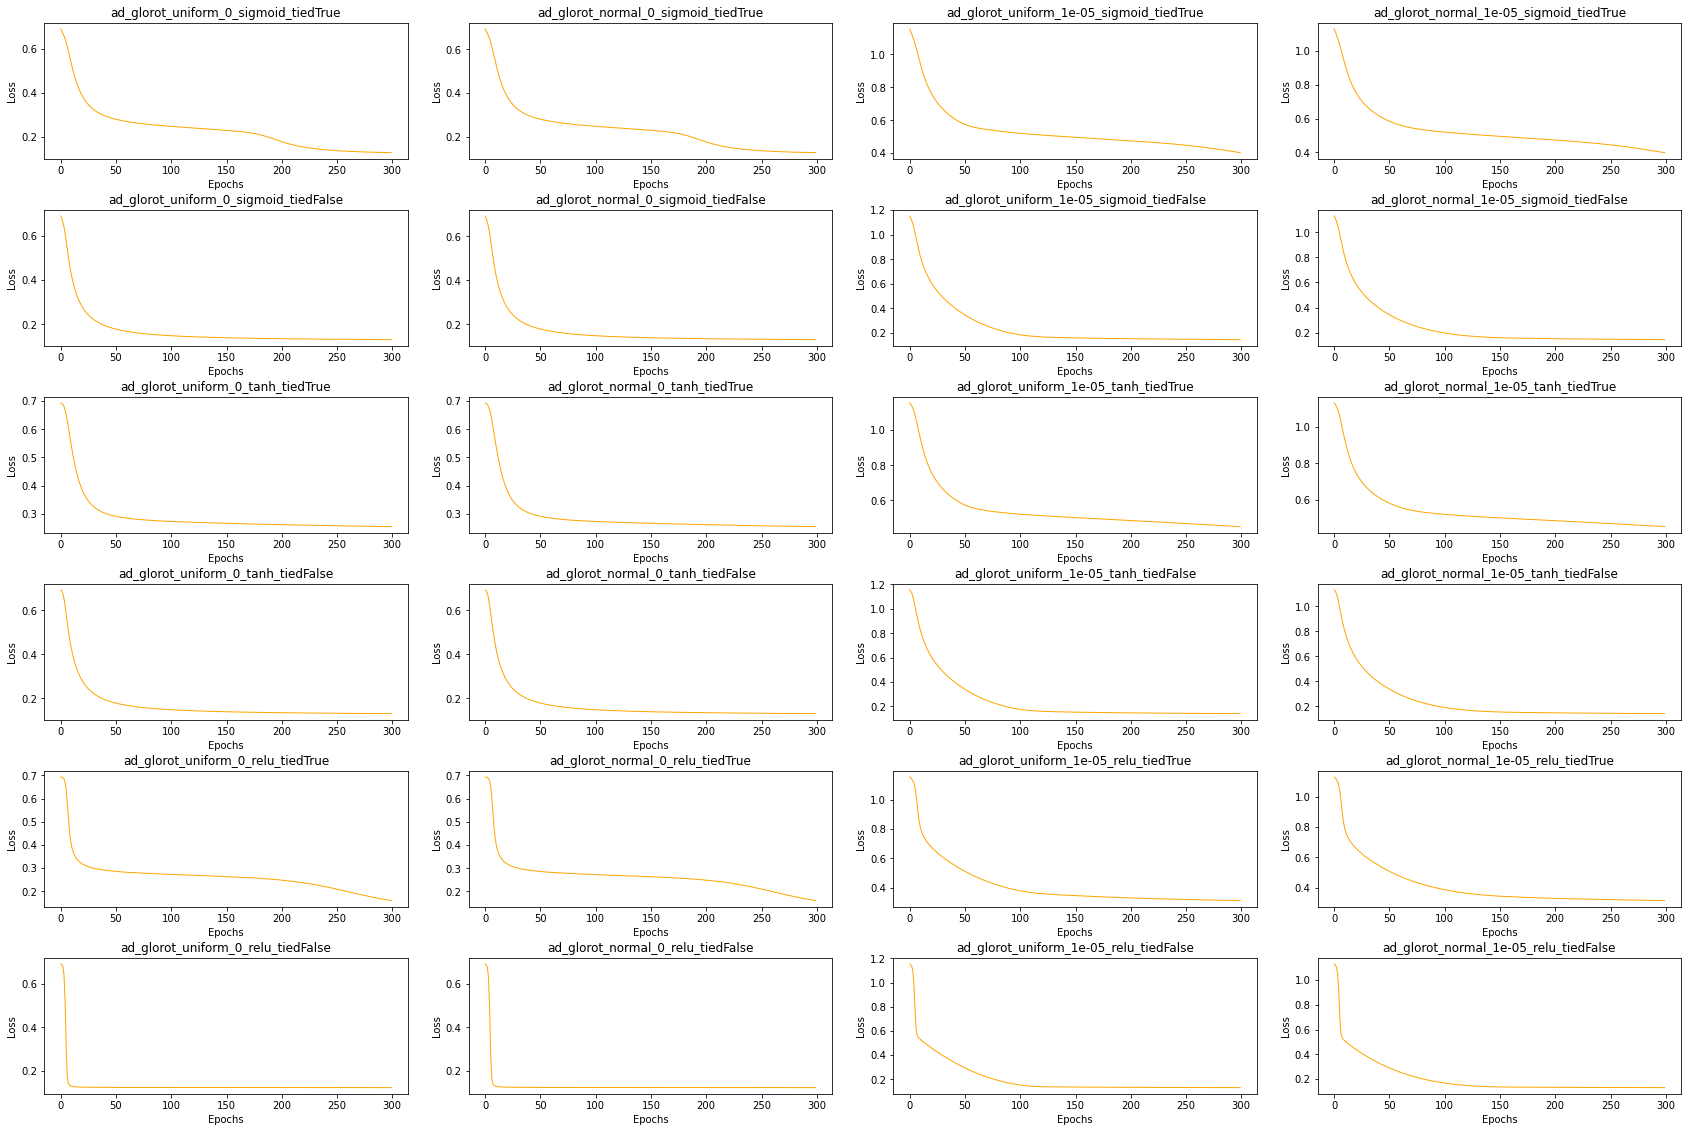

In [16]:
model_dict = model_dict_pan2

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,300)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

In [15]:
model_dict_pan2.keys()

dict_keys(['tf_adage'])

/Users/doingg/miniforge3/envs/tf/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


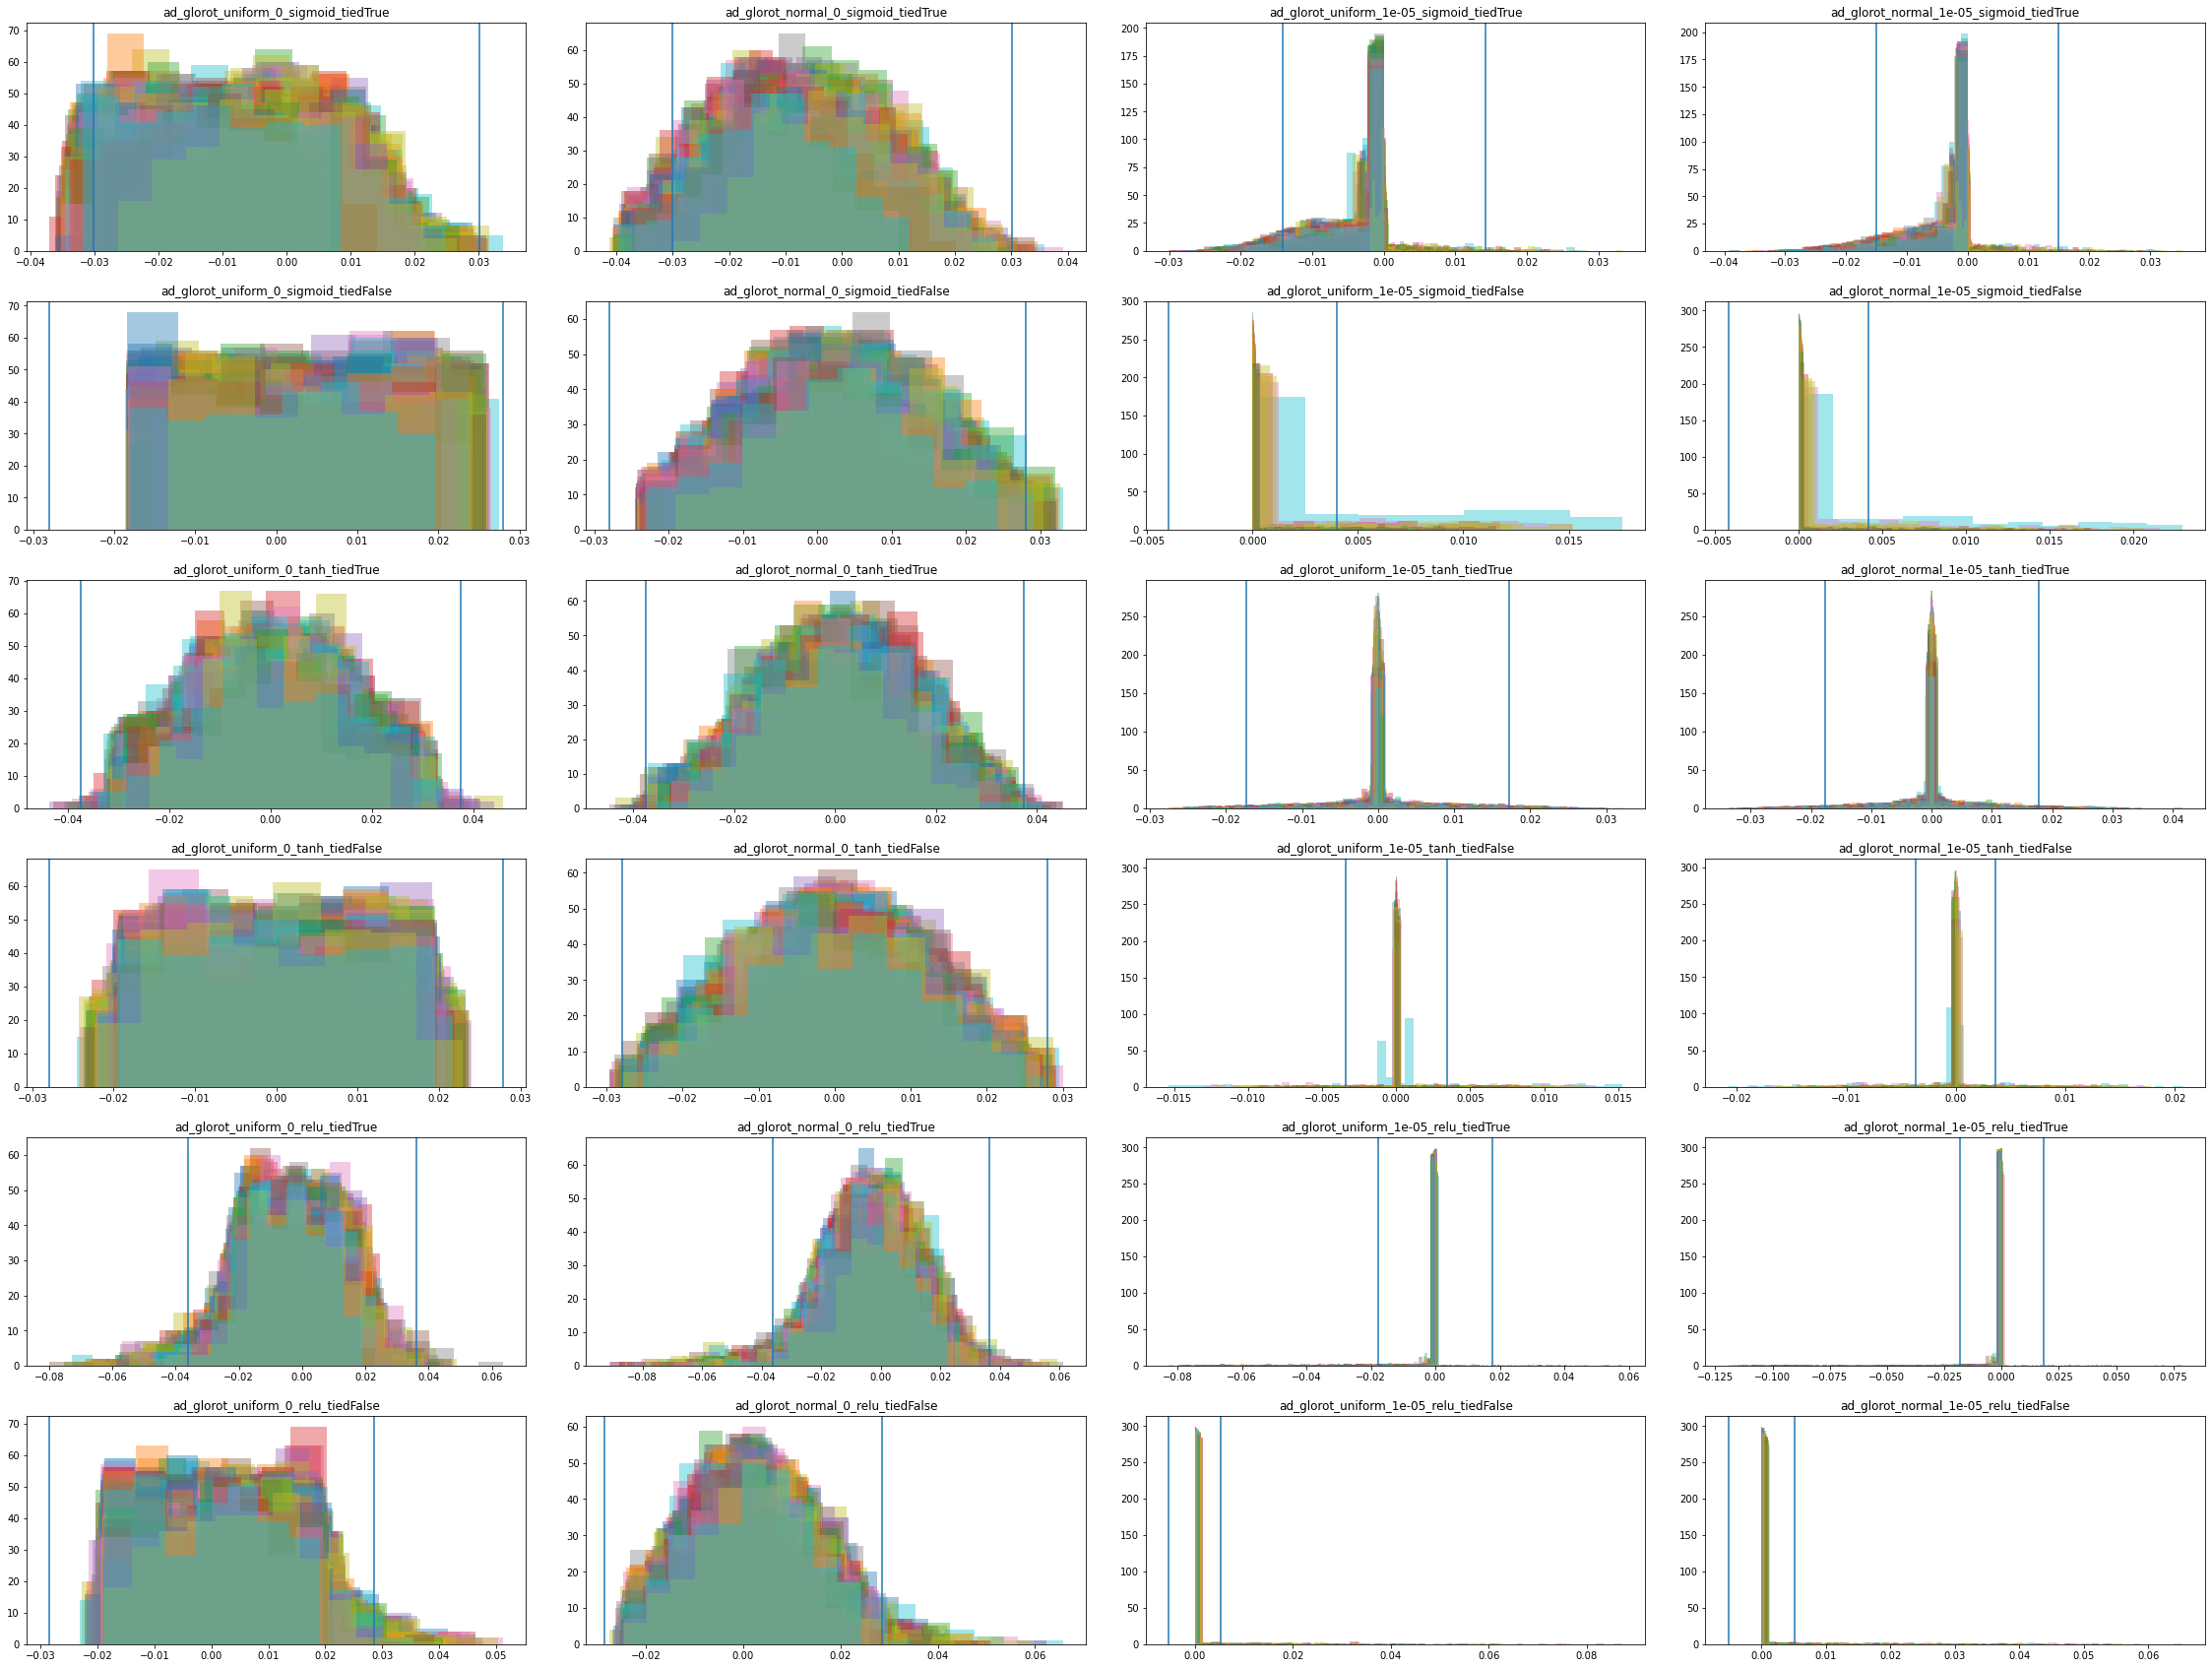

In [18]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_pan2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


    